In [1]:
#import libraries for scraping
import re
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt

In [2]:
# read url
httpObject = urlopen("https://www.flipkart.com/q/best-laptops-under-rs-50000")
webdata = httpObject.read()
print(webdata)

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.5ffd15.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [3]:
soup1 = soup(webdata)

In [4]:
#for multiple pages
pages_link = soup1.findAll('a',{'class':'ge-49M'})
domain = 'https://www.flipkart.com/q/best-laptops-under-rs-50000?page='

for i in range(2,42):
    link = domain+str(i)
    page_data = urlopen(link)
    webdata1 = page_data.read()
    webdata += webdata1

In [5]:
soupdata = soup(webdata, 'html.parser')
type(soupdata)

bs4.BeautifulSoup

In [6]:
containers = soupdata.findAll('div', {'class':'_2kHMtA'})
print(type(containers), len(containers))


<class 'bs4.element.ResultSet'> 984


In [7]:
f = open('laptops_info.csv','wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL\n'.encode())
for container in containers:
    # for product Name
    product = container.find('div',{'class':'_4rR01T'})
    ProductName = product.text.split('-')[0].strip()
    
    #for stars
    star = container.find('div', {'class':'_3LWZlK'})
    try:
        Stars = (star.text)
    except:
        Stars = 0
    
    #For Rating and Reviews
    Rating = container.find('span',{'class':'_2_R_DZ'}) 
    try:
        ratRev = re.findall('\d+,?\d*',Rating.text)
        Ratings = ratRev[0].replace(',','')
        Reviews = ratRev[1].replace(',','')
    except:
        Ratings = 0
        Reviews = 0
    
    # for current Price
    CurrentPrice = container.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace(',','').replace('₹','')
    
    # for MRP
    mrp = container.find('div', {'class':'_3I9_wc _27UcVY'})
    try:
        MRP = mrp.text.replace(',','').replace('₹','')
    except:
        MRP = 0
    
    # for information about the products
    info = container.findAll('li',{'class':'rgWa7D'})
    Processor = info[0].text
    RAM = info[1].text
    Storage = info[3].text
    
    #for product image url
    Image = container.img
    ImageURL = Image.get('src')
    
    print(ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL)
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{RAM},{Storage},{ImageURL}\n".encode())
    print('\n')
f.close()

MSI Bravo 15 Ryzen 7 Octa Core 5800H 4.4 312 45 57990 72990 AMD Ryzen 7 Octa Core Processor 16 GB DDR RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/d/h/q/-original-imagrmhu8wvhykb7.jpeg?q=70


Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U 4.3 2211 234 43990 68490 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


HP 14s Intel Core i3 11th Gen 4.3 3380 288 35990 47279 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/4/v/9/-original-imagp7pfeutcgxrn.jpeg?q=70


HP 15s Intel Core i3 12th Gen 4.3 919 105 41990 56261 Intel Core i3 Processor (12th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/o/l/e/-original-imagphhhan259czj.jpeg?q=70


HP Ryzen 5 Hexa Core 5500U 4.3 815 87 48890 59109 AMD Ryzen 5 Hexa Core Processor 16 GB DDR4 RAM 512 GB SSD htt

ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5 4.3 821 87 65990 75990 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 1 TB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/i/j/u/-original-imaggzes4pd7ptkx.jpeg?q=70


Lenovo IdeaPad 3 Core i3 12th Gen 4.1 345 31 39990 66390 Intel Core i3 Processor (12th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/j/m/2/-original-imagpa5gadtkbm6y.jpeg?q=70


HP Omen Core i7 12th Gen 0 0 0 196990 232324 Intel Core i7 Processor (12th Gen) 32 GB DDR5 RAM 1 TB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/o/j/i/17-ck1022tx-gaming-laptop-hp-original-imagg24gfaewgdzf.jpeg?q=70


HP OMEN Core i7 11th Gen 1 1 1 113990 132717 Intel Core i7 Processor (11th Gen) 16 GB DDR4 RAM 1 TB SSD https://rukminim2.flixcart.com/image/312/312/kzn17680/computer/1/i/z/-original-imagbhzqahdzyx4e.jpeg?q=70


Primebook 4G Android Based MediaTek MT8788 4.1 1291 403 16990 24990 MediaTek MediaTek MT8788 Processo

HP Envy Intel Core i7 11th Gen 4.5 17 2 98444 121900 Intel Core i7 Processor (11th Gen) 16 GB DDR4 RAM 1 TB SSD https://rukminim2.flixcart.com/image/312/312/kwmfqfk0/computer/d/a/7/13-ba1505tx-thin-and-light-laptop-hp-original-imag998yqherx66e.jpeg?q=70


HP Core i7 11th Gen 0 0 0 108999 135000 Intel Core i7 Processor (11th Gen) 16 GB DDR4 RAM 1 TB SSD https://rukminim2.flixcart.com/image/312/312/kwmfqfk0/computer/d/a/7/13-ba1505tx-thin-and-light-laptop-hp-original-imag998yqherx66e.jpeg?q=70


SAMSUNG Galaxy Book3 360 Core i7 13th Gen 2.8 4 0 109990 137990 Intel Core i7 Processor (13th Gen) 16 GB DDR4X RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/o/e/k/galaxy-book3-360-thin-and-light-laptop-samsung-original-imagqqgfg5zsbdvy.jpeg?q=70


HP Core i5 11th Gen 0 0 0 81500 84000 Intel Core i5 Processor (11th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/s/d/y/pavilion-15-laptop-hp-original-imaghrxdcurhkr9y.jpeg?q=70



CHUWI Celeron Dual Core 11th Gen 0 0 0 19490 34990 Intel Celeron Dual Core Processor (11th Gen) 8 GB DDR4 RAM 256 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/n/m/q/-original-imagrfsbcwgjjegf.jpeg?q=70


Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen 4.3 3560 325 53990 70790 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/ks99aq80/computer/y/z/7/na-gaming-laptop-lenovo-original-imag5ve3jvhgvsnx.jpeg?q=70


Acer Aspire Core i3 12th Gen 4.2 227 22 36990 48999 Intel Core i3 Processor (12th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/g/v/h/-original-imagqbudxbf9djaz.jpeg?q=70


Acer Extensa (2023) Ryzen 5 Quad Core 7520U 4.3 48 10 39990 50999 Stylish & Portable Thin and Light Laptop LPDDR5 RAM -faster & low power consuming FHD 1080p screen with 250 Nits brightness https://rukminim2.flixcart.com/image/312/312/xif0q/computer/y/l/p/-original-imagqmqjv5cyvbup.jpeg?q=70



In [8]:
df = pd.read_csv('laptops_info.csv', on_bad_lines='skip')
df

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,MSI Bravo 15 Ryzen 7 Octa Core 5800H,4.4,312,45,57990,72990,AMD Ryzen 7 Octa Core Processor,16 GB DDR RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
1,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,4.3,2211,234,43990,68490,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
2,HP 14s Intel Core i3 11th Gen,4.3,3380,288,35990,47279,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
3,HP 15s Intel Core i3 12th Gen,4.3,919,105,41990,56261,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
4,HP Ryzen 5 Hexa Core 5500U,4.3,815,87,48890,59109,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...,...
971,Acer Extensa 15 Non,4.1,16,5,33990,47999,AMD Ryzen 3 Quad Core Processor,8 GB LPDDR5 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
972,ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5,4.3,821,87,65990,75990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,1 TB SSD,https://rukminim2.flixcart.com/image/312/312/x...
973,Lenovo IdeaPad Slim 3 Intel Core i3 12th Gen,4.1,345,31,39990,64290,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
974,Acer Aspire 5 Core i5 12th Gen,4.3,7,1,57990,73999,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...


In [9]:
df.shape

(976, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   976 non-null    object 
 1   Stars         976 non-null    float64
 2   Ratings       976 non-null    int64  
 3   Reviews       976 non-null    int64  
 4   CurrentPrice  976 non-null    int64  
 5   MRP           976 non-null    int64  
 6   Processor     976 non-null    object 
 7   RAM           976 non-null    object 
 8   Storage       976 non-null    object 
 9   ImageURL      976 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 76.4+ KB


In [11]:
#Find the product having highest ratings?

df[df['Ratings']==max(df['Ratings'])]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
705,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,12048,1182,35500,50990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...


In [12]:
top10=df.sort_values(by='Ratings', ascending = False).head(10)

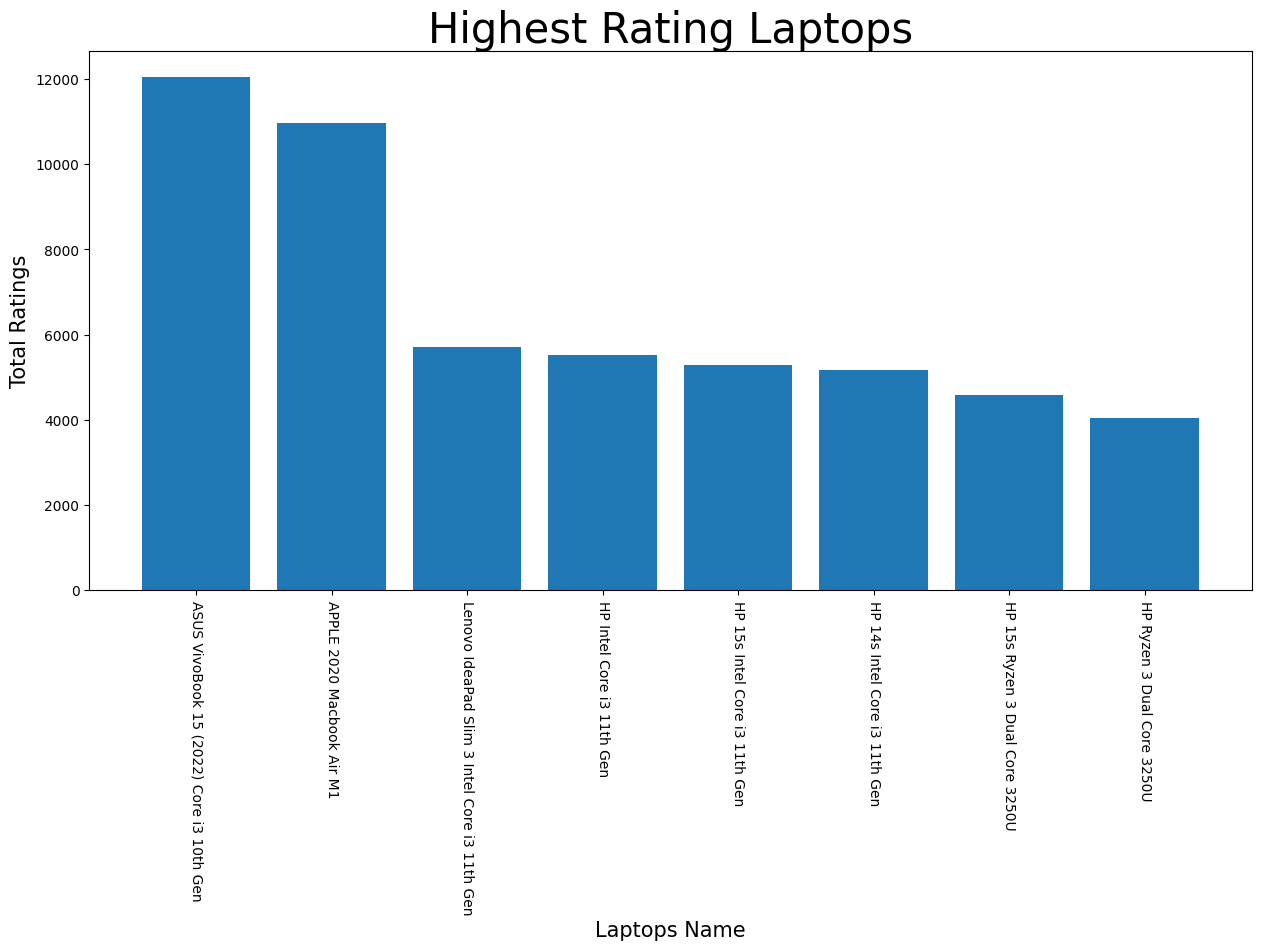

In [13]:
plt.figure(figsize=(15, 7))
plt.bar(x=top10['ProductName'],height=top10['Ratings'])
plt.title('Highest Rating Laptops', fontsize=30)
plt.xlabel('Laptops Name', fontsize=15)
plt.ylabel('Total Ratings', fontsize=15)
plt.xticks(rotation = 270)
plt.show()

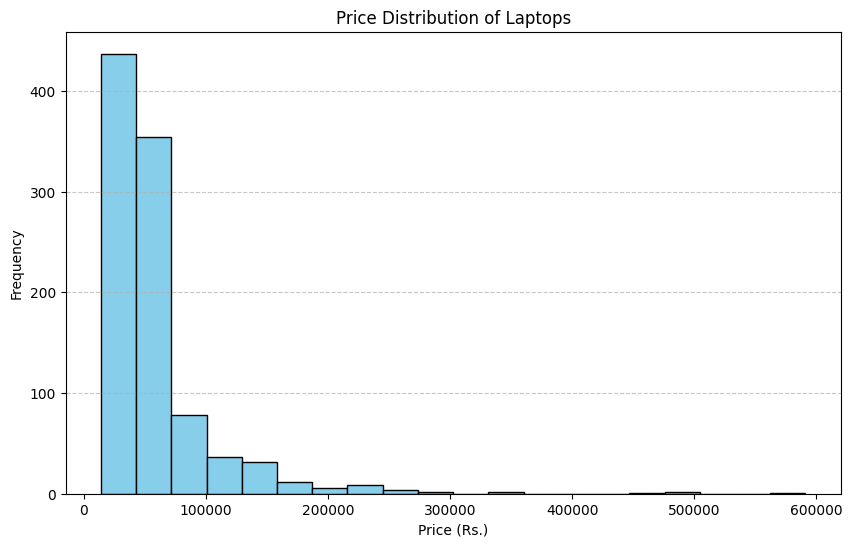

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['CurrentPrice'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Laptops')
plt.xlabel('Price (Rs.)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

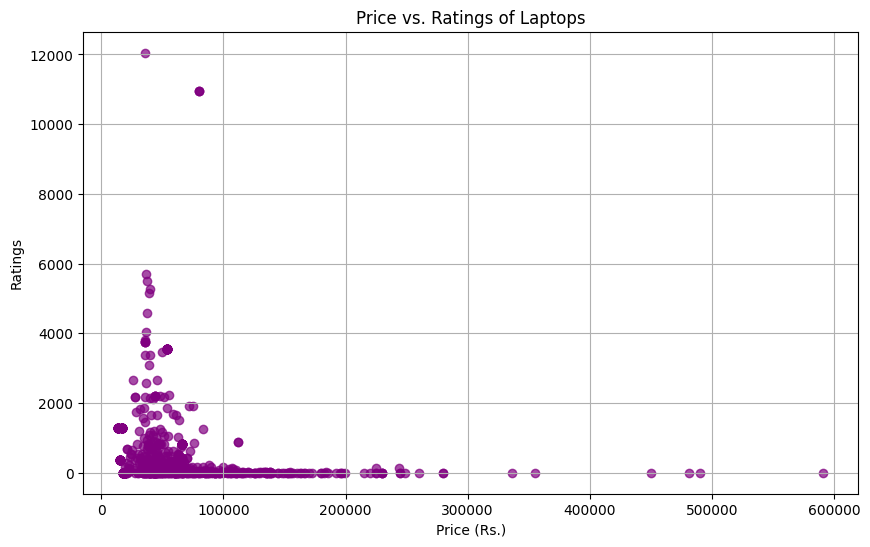

In [17]:
# Price vs. Ratings
plt.figure(figsize=(10, 6))
plt.scatter(df['CurrentPrice'], df['Ratings'], color='purple', alpha=0.7)
plt.title('Price vs. Ratings of Laptops')
plt.xlabel('Price (Rs.)')
plt.ylabel('Ratings')
plt.grid()
plt.show()